### Loan Amount Prediction 

The Goal of the project is to predict the amount of loan given to the customers based on all the features

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ID = test['Customer ID']
train = train.reset_index()
test = test.reset_index()

In [3]:
train.head()

,index,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Amount
0,0,C-45418,Kristeen Brasfield,F,18,3563.37,Low,Working,NaN,Semi-Urban,...,813.46,0,Active,300,3563.37,4,Urban,1,103386.96,0.00
1,1,C-40631,Britteny Newhall,M,18,945.97,Low,Working,Core staff,Rural,...,714.64,0,Active,468,945.97,1,Semi-Urban,1,68821.86,27067.87
2,2,C-2792,Angelyn Kos,F,65,1214.89,High,Pensioner,NaN,Semi-Urban,...,882.74,0,Active,435,1214.89,2,Rural,1,132328.05,64067.85
3,3,C-48860,Gerry Keo,F,21,1387.61,Low,Working,Laborers,Semi-Urban,...,623.82,1,Inactive,260,1387.61,2,Semi-Urban,1,29751.86,0.00
4,4,C-23070,Zoraida Bean,F,32,1694.64,Low,Working,Accountants,Semi-Urban,...,870.92,1,Active,762,1694.64,1,Rural,1,56422.70,26231.78


In [4]:
print('Train data shape : ',train.shape)
print('Test data shape : ',test.shape)

Train data shape :  (27000, 25)
Test data shape :  (3000, 24)


### Data Preprocessing
We are going to perform the basic data preprocessing 

#### Checking for null values

The first thing we check in the data is NULL values
our data have null values, we will have to elimate them

<AxesSubplot:>

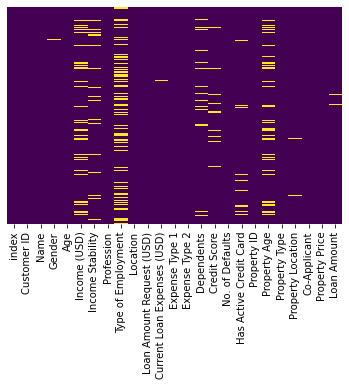

In [5]:
#Heat map showing values which are not available or null in the train dataset
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

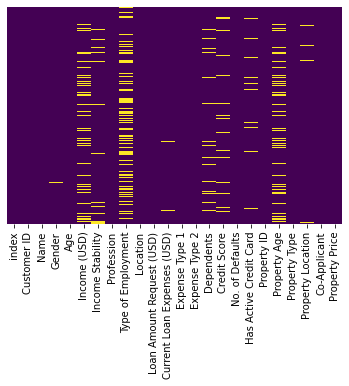

In [6]:
#Heat map showing values which are not available or null in the test dataset
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# Lets check the locations
train['Location'].value_counts()

Semi-Urban    19416
Rural          4806
Urban          2778
Name: Location, dtype: int64

In [8]:
# Lets check the profession 
train['Profession'].value_counts()

Working                 15251
Commercial associate     7129
Pensioner                2481
State servant            2133
Businessman                 2
Unemployed                  2
Maternity leave             1
Student                     1
Name: Profession, dtype: int64

In [9]:
# Lets check the income stability, we can see that the number of low income are higher than high income
train['Income Stability'].value_counts()

Low     23168
High     2326
Name: Income Stability, dtype: int64

In [10]:
# Lets check the locations of properties 
train['Property Location'].value_counts()

Semi-Urban    9357
Rural         9041
Urban         8295
Name: Property Location, dtype: int64

<AxesSubplot:>

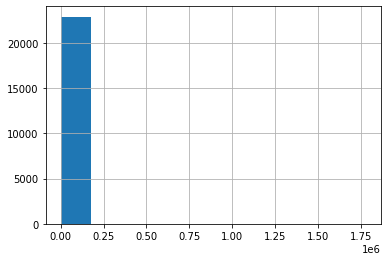

In [11]:
# Now lets check the income of each Applicant
# Box Plot for understanding the distributions and to observe the outliers.
%matplotlib inline
# Histogram of variable ApplicantIncome
train['Income (USD)'].hist()

<AxesSubplot:>

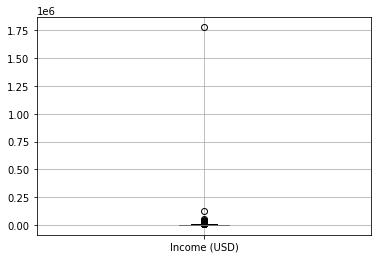

In [12]:
# Box Plot for variable ApplicantIncome of training data set
train.boxplot(column='Income (USD)')

So we noted some major outliers also

<AxesSubplot:title={'center':'Income (USD)'}, xlabel='Profession'>

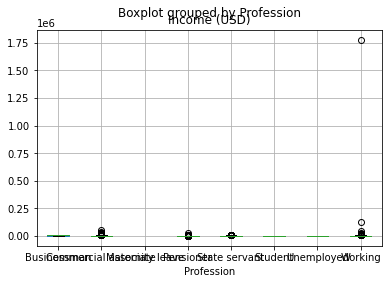

In [13]:
# Box Plot for variable ApplicantIncome by variable profession of training data set
train.boxplot(column='Income (USD)', by = 'Profession')

<AxesSubplot:>

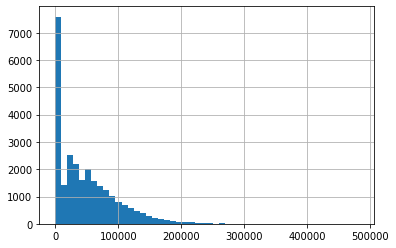

In [14]:
# Histogram of variable LoanAmount
train['Loan Amount'].hist(bins=50)

<AxesSubplot:>

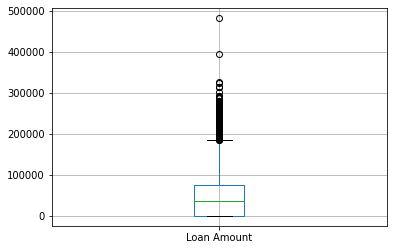

In [15]:
# Box Plot for variable LoanAmount of training data set
train.boxplot(column='Loan Amount')

<AxesSubplot:title={'center':'Loan Amount'}, xlabel='Gender'>

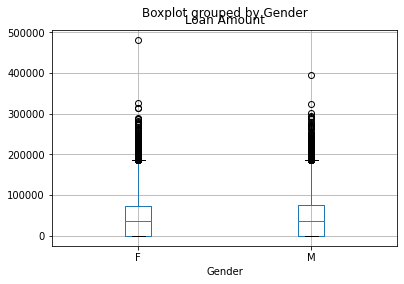

In [16]:
# Box Plot for variable LoanAmount by variable Gender of training data set
train.boxplot(column='Loan Amount', by = 'Gender')

### Lets see the distribution of categorical features

In [17]:
# Loan approval rates in absolute numbers
loan_approval = train['Gender'].value_counts()['M'] # we are checking the Male only
print(loan_approval)

13507


In [18]:
loan_approval = train['Gender'].value_counts()['F'] # we are checking the Female only here
print(loan_approval)

13450


#### One Hot Encoding

This is the process where we convert categorical features to numerical features 
- in our data we have columns like Gender, Income Stability etc which are categorical
- we will use onehot endcoding technique to convert them into categorical features 

In [19]:
# encoding the training dataset
sex = pd.get_dummies(train['Gender'],drop_first=True)
Income_Stability = pd.get_dummies(train['Income Stability'],drop_first=True)
Profession = pd.get_dummies(train['Profession'],drop_first=True)
Type_of_Employment = pd.get_dummies(train['Type of Employment'],drop_first=True)
Location = pd.get_dummies(train['Location'],drop_first=True)
Expense_Type_1 = pd.get_dummies(train['Expense Type 1'],drop_first=True)
Expense_Type_2 = pd.get_dummies(train['Expense Type 2'],drop_first=True)
Has_Active_Credit_Card = pd.get_dummies(train['Has Active Credit Card'],drop_first=True)
Property_Location = pd.get_dummies(train['Property Location'],drop_first=True)

In [20]:
# encoding the test dataset
sex = pd.get_dummies(test['Gender'],drop_first=True)
Income_Stability = pd.get_dummies(test['Income Stability'],drop_first=True)
Profession = pd.get_dummies(test['Profession'],drop_first=True)
Type_of_Employment = pd.get_dummies(test['Type of Employment'],drop_first=True)
Location = pd.get_dummies(test['Location'],drop_first=True)
Expense_Type_1 = pd.get_dummies(test['Expense Type 1'],drop_first=True)
Expense_Type_2 = pd.get_dummies(test['Expense Type 2'],drop_first=True)
Has_Active_Credit_Card = pd.get_dummies(test['Has Active Credit Card'],drop_first=True)
Property_Location = pd.get_dummies(test['Property Location'],drop_first=True)

In [21]:
test.drop(['Customer ID','Name','Gender','Income Stability','Profession','Type of Employment','Location','Expense Type 1','Expense Type 2','Has Active Credit Card','Property Location'],axis=1,inplace=True)
test = pd.concat([test,sex,Income_Stability,Profession,Type_of_Employment,Location,Expense_Type_1,Expense_Type_2,Has_Active_Credit_Card,Property_Location],axis=1)

In [22]:
train.drop(['Customer ID','Name','Gender','Income Stability','Profession','Type of Employment','Location','Expense Type 1','Expense Type 2','Has Active Credit Card','Property Location'],axis=1,inplace=True)
train = pd.concat([train,sex,Income_Stability,Profession,Type_of_Employment,Location,Expense_Type_1,Expense_Type_2,Has_Active_Credit_Card,Property_Location],axis=1)
train.head()

,index,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,...,Security staff,Waiters/barmen staff,Semi-Urban,Urban,Y,Y,Inactive,Unpossessed,Semi-Urban,Urban
0,0,18,3563.37,93876.03,727.60,1.0,813.46,0,300,3563.37,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,18,945.97,38668.39,202.55,3.0,714.64,0,468,945.97,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
2,2,65,1214.89,85423.80,272.92,NaN,882.74,0,435,1214.89,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
3,3,21,1387.61,24693.00,140.52,1.0,623.82,1,260,1387.61,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,32,1694.64,34975.71,214.60,2.0,870.92,1,762,1694.64,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [23]:
train.dropna(inplace = True)

In [24]:
test.dropna(inplace = True)

In [25]:
train.dtypes

index                            int64
Age                              int64
Income (USD)                   float64
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Property ID                      int64
Property Age                   float64
Property Type                    int64
Co-Applicant                     int64
Property Price                 float64
Loan Amount                    float64
M                              float64
Low                            float64
Pensioner                      float64
State servant                  float64
Working                        float64
Cleaning staff                 float64
Cooking staff                  float64
Core staff                     float64
Drivers                        float64
HR staff                       float64
High skill tech staff          float64
IT staff                 

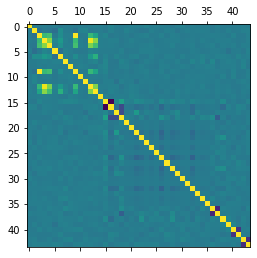

In [26]:
plt.matshow(train.corr())
plt.show()

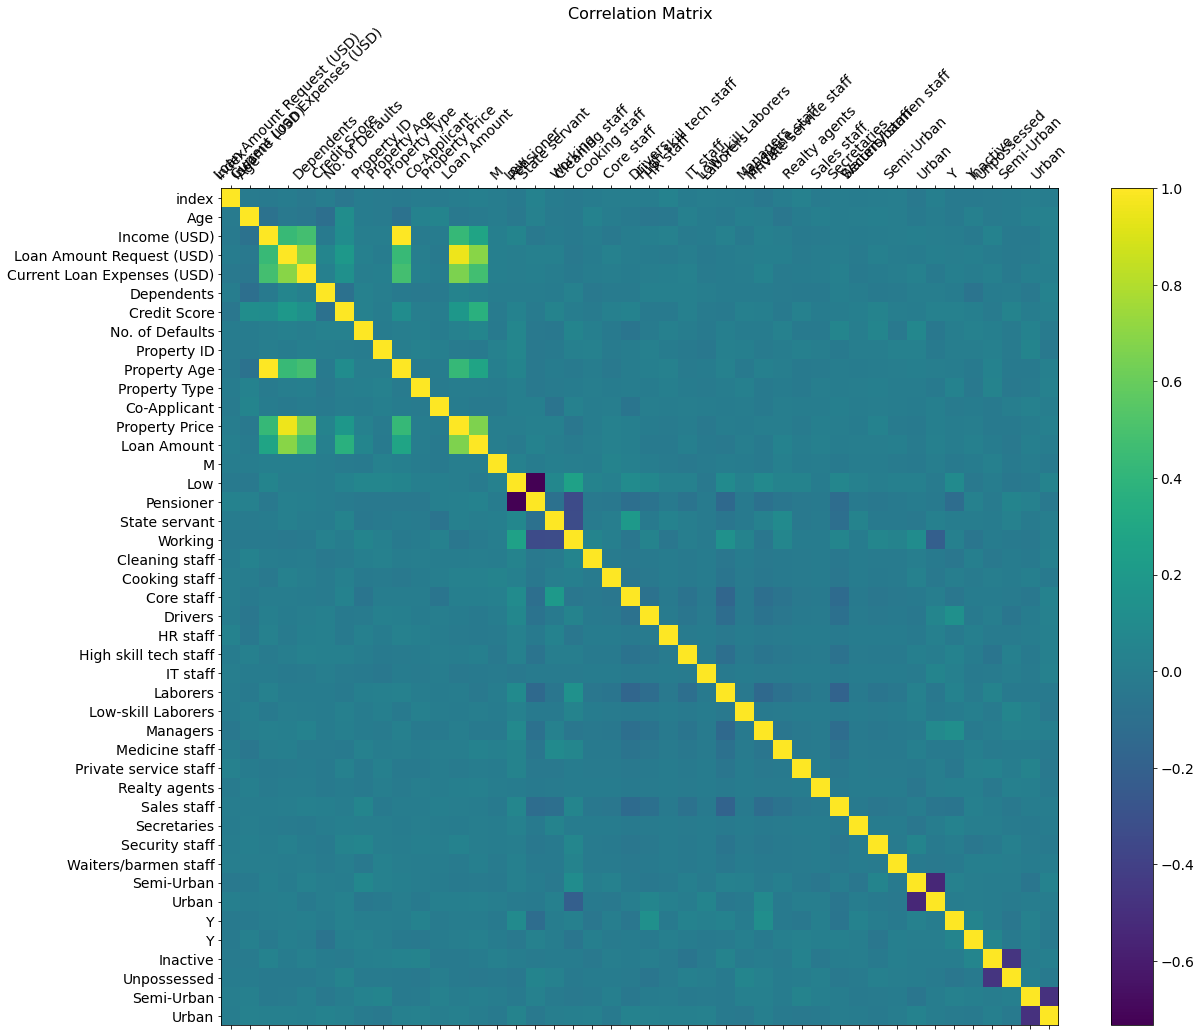

In [27]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train.corr(), fignum=f.number)
plt.xticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

The correlation is good, so we are not going to drop any columm

### Splitting the data

we will split the data into test and train set
- train set will be used to train the model
- test set will be used to test the model

In [28]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()

In [29]:
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(train)

In [30]:
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(train)

In [31]:
# training set
X = train.drop('Loan Amount', axis = 1)
y = train['Loan Amount']

### Model Building

we are going to train two machine learning models
- Linear Regression
- DNN

#### Linear Regression

In [32]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
Linear_regressor = LinearRegression()  
Linear_regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [35]:
Linear_regressor.predict(X_test)

array([ 4.94846943e+04,  3.49999918e+04,  7.09341633e+04,  4.27855745e+04,
        2.84332495e+03,  8.46543049e+04,  1.88497087e+04,  3.94382866e+02,
        7.42539587e+04,  5.94745931e+04,  1.63464948e+05, -7.31686357e+03,
        3.64444779e+03,  2.73338255e+04,  1.14135398e+04, -2.00213240e+03,
        9.02660393e+04,  4.67242094e+04,  3.38874934e+04,  8.37969573e+04,
        7.39512865e+04,  2.28728266e+04,  4.32898159e+04,  3.04672700e+04,
        5.64944258e+04,  6.12841750e+04,  7.76011298e+04, -5.55539233e+03,
        7.27392839e+04,  4.85223280e+04,  5.40578263e+04,  2.12621759e+04,
        2.32703636e+04,  1.13424883e+04,  8.78756923e+04,  3.49683723e+04,
        4.67804654e+04,  6.78056141e+04,  1.02120606e+04,  1.07542070e+05,
        6.61353933e+04,  1.98679896e+04,  3.38826511e+04,  8.45510309e+04,
        8.03950135e+04,  6.36853927e+04,  3.67645025e+04,  5.42276567e+04,
       -7.41807509e+03,  7.85563406e+04,  6.32278903e+04,  1.89079009e+04,
        5.39016662e+04, -

In [36]:
# Accuracy of the model
Linear_regressor.score(X_test,y_test)

0.5901477061480696

Now lets test the model with the testing data

In [37]:
Predictions = Linear_regressor.predict(test)

In [38]:
Predictions

array([ 34524.54867985,  85930.90542605,  67573.47725195, ...,
       105109.53539059,  88109.19481128,  27900.31189012])

In [39]:
prediction = pd.DataFrame(Predictions, columns=['Predictions'])

In [40]:
prediction = prediction[(prediction['Predictions']>0)]

In [41]:
prediction.to_csv('Linear_Predctions.csv')
prediction.head(2)

,Predictions
0,34524.548680
1,85930.905426


#### DNN (Deep Neural Network)

In [43]:
import tensorflow as tf
import seaborn as sns

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

print('Libraries are imported.')

Libraries are imported.


In [44]:
# Creating a skeleton of model.
from tensorflow.keras.models import Sequential
# Defining layers
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import InputLayer

In [45]:
# Input neurons
input_neurons = X_train.shape[1]
# Output neurons (Since it is binary classification)
output_neurons = 1
# Defining hidden layers & neurons in each layersnumber_of_hidden_layers = 2
neuron_hidden_layer_1         = 10
neuron_hidden_layer_2         = 5
# Defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [46]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 500)

Epoch 1/500
55/55 [==============================] - 2s 9ms/step - loss: -1979671680.0000 - accuracy: 0.0000e+00 - val_loss: -3311952128.0000 - val_accuracy: 0.0000e+00
Epoch 2/500
55/55 [==============================] - 0s 5ms/step - loss: -4317657600.0000 - accuracy: 0.0000e+00 - val_loss: -6313008640.0000 - val_accuracy: 0.0000e+00
Epoch 3/500
55/55 [==============================] - 0s 4ms/step - loss: -7655200768.0000 - accuracy: 0.0000e+00 - val_loss: -10599069696.0000 - val_accuracy: 0.0000e+00
Epoch 4/500
55/55 [==============================] - 0s 6ms/step - loss: -12461694976.0000 - accuracy: 0.0000e+00 - val_loss: -16973555712.0000 - val_accuracy: 0.0000e+00
Epoch 5/500
55/55 [==============================] - 0s 5ms/step - loss: -19562113024.0000 - accuracy: 0.0000e+00 - val_loss: -26269032448.0000 - val_accuracy: 0.0000e+00
Epoch 6/500
55/55 [==============================] - 0s 4ms/step - loss: -29855367168.0000 - accuracy: 0.0000e+00 - val_loss: -39496548352.0000 - val_

Epoch 48/500
55/55 [==============================] - 0s 4ms/step - loss: -8567405412352.0000 - accuracy: 0.0000e+00 - val_loss: -9514787012608.0000 - val_accuracy: 0.0000e+00
Epoch 49/500
55/55 [==============================] - 0s 4ms/step - loss: -9058462466048.0000 - accuracy: 0.0000e+00 - val_loss: -10050077720576.0000 - val_accuracy: 0.0000e+00
Epoch 50/500
55/55 [==============================] - 0s 5ms/step - loss: -9561410895872.0000 - accuracy: 0.0000e+00 - val_loss: -10595203022848.0000 - val_accuracy: 0.0000e+00
Epoch 51/500
55/55 [==============================] - 0s 5ms/step - loss: -10072893685760.0000 - accuracy: 0.0000e+00 - val_loss: -11164084862976.0000 - val_accuracy: 0.0000e+00
Epoch 52/500
55/55 [==============================] - 0s 5ms/step - loss: -10604991479808.0000 - accuracy: 0.0000e+00 - val_loss: -11737198755840.0000 - val_accuracy: 0.0000e+00
Epoch 53/500
55/55 [==============================] - 0s 5ms/step - loss: -11161049235456.0000 - accuracy: 0.0000e

55/55 [==============================] - 0s 5ms/step - loss: -48116728332288.0000 - accuracy: 0.0000e+00 - val_loss: -52611570991104.0000 - val_accuracy: 0.0000e+00
Epoch 95/500
55/55 [==============================] - 0s 4ms/step - loss: -49402995539968.0000 - accuracy: 0.0000e+00 - val_loss: -54020261543936.0000 - val_accuracy: 0.0000e+00
Epoch 96/500
55/55 [==============================] - 0s 4ms/step - loss: -50711882629120.0000 - accuracy: 0.0000e+00 - val_loss: -55454105337856.0000 - val_accuracy: 0.0000e+00
Epoch 97/500
55/55 [==============================] - 0s 5ms/step - loss: -52034577367040.0000 - accuracy: 0.0000e+00 - val_loss: -56879308865536.0000 - val_accuracy: 0.0000e+00
Epoch 98/500
55/55 [==============================] - 0s 5ms/step - loss: -53385583656960.0000 - accuracy: 0.0000e+00 - val_loss: -58326821896192.0000 - val_accuracy: 0.0000e+00
Epoch 99/500
55/55 [==============================] - 0s 6ms/step - loss: -54757200756736.0000 - accuracy: 0.0000e+00 - val

Epoch 140/500
55/55 [==============================] - 0s 4ms/step - loss: -129209729024000.0000 - accuracy: 0.0000e+00 - val_loss: -140644123148288.0000 - val_accuracy: 0.0000e+00
Epoch 141/500
55/55 [==============================] - 0s 5ms/step - loss: -131508408942592.0000 - accuracy: 0.0000e+00 - val_loss: -143122487050240.0000 - val_accuracy: 0.0000e+00
Epoch 142/500
55/55 [==============================] - 0s 4ms/step - loss: -133834519609344.0000 - accuracy: 0.0000e+00 - val_loss: -145634170503168.0000 - val_accuracy: 0.0000e+00
Epoch 143/500
55/55 [==============================] - 0s 4ms/step - loss: -136182071558144.0000 - accuracy: 0.0000e+00 - val_loss: -148175801286656.0000 - val_accuracy: 0.0000e+00
Epoch 144/500
55/55 [==============================] - 0s 5ms/step - loss: -138527668961280.0000 - accuracy: 0.0000e+00 - val_loss: -150765633011712.0000 - val_accuracy: 0.0000e+00
Epoch 145/500
55/55 [==============================] - 0s 5ms/step - loss: -140911065432064.000

55/55 [==============================] - 0s 4ms/step - loss: -257378901557248.0000 - accuracy: 0.0000e+00 - val_loss: -279476743176192.0000 - val_accuracy: 0.0000e+00
Epoch 186/500
55/55 [==============================] - 0s 4ms/step - loss: -260825092718592.0000 - accuracy: 0.0000e+00 - val_loss: -283237893013504.0000 - val_accuracy: 0.0000e+00
Epoch 187/500
55/55 [==============================] - 0s 4ms/step - loss: -264361226534912.0000 - accuracy: 0.0000e+00 - val_loss: -287084505989120.0000 - val_accuracy: 0.0000e+00
Epoch 188/500
55/55 [==============================] - 0s 4ms/step - loss: -267908164878336.0000 - accuracy: 0.0000e+00 - val_loss: -290953600434176.0000 - val_accuracy: 0.0000e+00
Epoch 189/500
55/55 [==============================] - 0s 4ms/step - loss: -271448023236608.0000 - accuracy: 0.0000e+00 - val_loss: -294754914926592.0000 - val_accuracy: 0.0000e+00
Epoch 190/500
55/55 [==============================] - 0s 4ms/step - loss: -275004289712128.0000 - accuracy: 

55/55 [==============================] - 0s 6ms/step - loss: -443152511008768.0000 - accuracy: 0.0000e+00 - val_loss: -480632241127424.0000 - val_accuracy: 0.0000e+00
Epoch 231/500
55/55 [==============================] - 0s 5ms/step - loss: -447991060103168.0000 - accuracy: 0.0000e+00 - val_loss: -485934780907520.0000 - val_accuracy: 0.0000e+00
Epoch 232/500
55/55 [==============================] - 0s 5ms/step - loss: -452837830033408.0000 - accuracy: 0.0000e+00 - val_loss: -491242991386624.0000 - val_accuracy: 0.0000e+00
Epoch 233/500
55/55 [==============================] - 0s 5ms/step - loss: -457775767355392.0000 - accuracy: 0.0000e+00 - val_loss: -496426815586304.0000 - val_accuracy: 0.0000e+00
Epoch 234/500
55/55 [==============================] - 0s 5ms/step - loss: -462657970765824.0000 - accuracy: 0.0000e+00 - val_loss: -501812201259008.0000 - val_accuracy: 0.0000e+00
Epoch 235/500
55/55 [==============================] - 0s 5ms/step - loss: -467667009929216.0000 - accuracy: 

55/55 [==============================] - 0s 6ms/step - loss: -695494858768384.0000 - accuracy: 0.0000e+00 - val_loss: -753696430358528.0000 - val_accuracy: 0.0000e+00
Epoch 276/500
55/55 [==============================] - 0s 5ms/step - loss: -701893286297600.0000 - accuracy: 0.0000e+00 - val_loss: -760653337853952.0000 - val_accuracy: 0.0000e+00
Epoch 277/500
55/55 [==============================] - 0s 5ms/step - loss: -708339159793664.0000 - accuracy: 0.0000e+00 - val_loss: -767499448614912.0000 - val_accuracy: 0.0000e+00
Epoch 278/500
55/55 [==============================] - 0s 5ms/step - loss: -714773356347392.0000 - accuracy: 0.0000e+00 - val_loss: -774546147770368.0000 - val_accuracy: 0.0000e+00
Epoch 279/500
55/55 [==============================] - 0s 5ms/step - loss: -721343045697536.0000 - accuracy: 0.0000e+00 - val_loss: -781768001060864.0000 - val_accuracy: 0.0000e+00
Epoch 280/500
55/55 [==============================] - 0s 5ms/step - loss: -727940920770560.0000 - accuracy: 

55/55 [==============================] - 0s 6ms/step - loss: -1023554527166464.0000 - accuracy: 0.0000e+00 - val_loss: -1108584007991296.0000 - val_accuracy: 0.0000e+00
Epoch 321/500
55/55 [==============================] - 0s 7ms/step - loss: -1031917096927232.0000 - accuracy: 0.0000e+00 - val_loss: -1117427144327168.0000 - val_accuracy: 0.0000e+00
Epoch 322/500
55/55 [==============================] - 0s 5ms/step - loss: -1040251279638528.0000 - accuracy: 0.0000e+00 - val_loss: -1126533817171968.0000 - val_accuracy: 0.0000e+00
Epoch 323/500
55/55 [==============================] - 0s 5ms/step - loss: -1048550431522816.0000 - accuracy: 0.0000e+00 - val_loss: -1135483321057280.0000 - val_accuracy: 0.0000e+00
Epoch 324/500
55/55 [==============================] - 0s 5ms/step - loss: -1056855488987136.0000 - accuracy: 0.0000e+00 - val_loss: -1144383969689600.0000 - val_accuracy: 0.0000e+00
Epoch 325/500
55/55 [==============================] - 0s 5ms/step - loss: -1065250136784896.0000 -

Epoch 365/500
55/55 [==============================] - 0s 5ms/step - loss: -1435912122662912.0000 - accuracy: 0.0000e+00 - val_loss: -1554274173583360.0000 - val_accuracy: 0.0000e+00
Epoch 366/500
55/55 [==============================] - 0s 6ms/step - loss: -1446043547860992.0000 - accuracy: 0.0000e+00 - val_loss: -1565309555179520.0000 - val_accuracy: 0.0000e+00
Epoch 367/500
55/55 [==============================] - 0s 5ms/step - loss: -1456259396009984.0000 - accuracy: 0.0000e+00 - val_loss: -1576303329280000.0000 - val_accuracy: 0.0000e+00
Epoch 368/500
55/55 [==============================] - 0s 8ms/step - loss: -1466555506360320.0000 - accuracy: 0.0000e+00 - val_loss: -1587559096385536.0000 - val_accuracy: 0.0000e+00
Epoch 369/500
55/55 [==============================] - 0s 6ms/step - loss: -1476989995188224.0000 - accuracy: 0.0000e+00 - val_loss: -1598550991437824.0000 - val_accuracy: 0.0000e+00
Epoch 370/500
55/55 [==============================] - 0s 6ms/step - loss: -148719228

Epoch 410/500
55/55 [==============================] - 0s 5ms/step - loss: -1940794252460032.0000 - accuracy: 0.0000e+00 - val_loss: -2100172838404096.0000 - val_accuracy: 0.0000e+00
Epoch 411/500
55/55 [==============================] - 0s 5ms/step - loss: -1953124029825024.0000 - accuracy: 0.0000e+00 - val_loss: -2113379862839296.0000 - val_accuracy: 0.0000e+00
Epoch 412/500
55/55 [==============================] - 0s 5ms/step - loss: -1965481187606528.0000 - accuracy: 0.0000e+00 - val_loss: -2126856530690048.0000 - val_accuracy: 0.0000e+00
Epoch 413/500
55/55 [==============================] - 0s 5ms/step - loss: -1977947061747712.0000 - accuracy: 0.0000e+00 - val_loss: -2140521506013184.0000 - val_accuracy: 0.0000e+00
Epoch 414/500
55/55 [==============================] - 0s 5ms/step - loss: -1990472796995584.0000 - accuracy: 0.0000e+00 - val_loss: -2153641825796096.0000 - val_accuracy: 0.0000e+00
Epoch 415/500
55/55 [==============================] - 0s 6ms/step - loss: -200291665

Epoch 455/500
55/55 [==============================] - 0s 5ms/step - loss: -2547567904686080.0000 - accuracy: 0.0000e+00 - val_loss: -2755862812688384.0000 - val_accuracy: 0.0000e+00
Epoch 456/500
55/55 [==============================] - 0s 5ms/step - loss: -2562138849673216.0000 - accuracy: 0.0000e+00 - val_loss: -2771449249005568.0000 - val_accuracy: 0.0000e+00
Epoch 457/500
55/55 [==============================] - 0s 5ms/step - loss: -2576763481751552.0000 - accuracy: 0.0000e+00 - val_loss: -2787487999066112.0000 - val_accuracy: 0.0000e+00
Epoch 458/500
55/55 [==============================] - 0s 5ms/step - loss: -2591517499719680.0000 - accuracy: 0.0000e+00 - val_loss: -2803313611374592.0000 - val_accuracy: 0.0000e+00
Epoch 459/500
55/55 [==============================] - 0s 5ms/step - loss: -2606259974963200.0000 - accuracy: 0.0000e+00 - val_loss: -2819425912750080.0000 - val_accuracy: 0.0000e+00
Epoch 460/500
55/55 [==============================] - 0s 5ms/step - loss: -262116512

In [ ]:
# Getting predictions for the test set
prediction_nn = model.predict_classes(X_test)
# Getting accuracy score

#### Gradient Boosting 
#### Random Forest

In [ ]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
#this function used to evalute the models with features and terget.
def models_score(models, x_train, x_test, y_train, y_test):    
    scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred=model.predict(x_test) 
        scores[name] =r2_score(y_test,y_pred)
        #printing the model name and accuracy !!!!!
        print("Model name: ",model)
        print("R2 score :--->>",r2_score(y_test,y_pred))
        print("MSE",mean_squared_error(y_test,y_pred))
        print("MAE",mean_absolute_error(y_test,y_pred))
        print("\n<<<<------------------------------------------------------------->>>>\n")
           
   
    model_scores = pd.DataFrame(scores, index=['score']).transpose()
    model_scores = model_scores.sort_values('score',ascending=False)
    return model_scores

In [ ]:
#initialize the models 
models = {"GradiantBoost":GradientBoostingRegressor(random_state=22, n_estimators = 142),
         "RandomForest":RandomForestRegressor(random_state=150)}

In [ ]:
#Calling the function
model_scores = models_score(models, X_train, X_test, y_train, y_test)

In [ ]:
#printing the model score
model_scores

we got good accuracy on Gradient Boosting and Random Forest than Linear Regression

#### Parameter tuning
lets do some parameter tuning of gradient boosting and random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random = RandomForestRegressor(n_estimators=100,bootstrap= True,
 criterion='mse',
 max_depth=25,
 max_features= 'auto',
 max_leaf_nodes= None,
 min_impurity_decrease= 0.0,
#  min_impurity_split= None,
 min_samples_leaf= 1,
 min_samples_split= 25,
 min_weight_fraction_leaf=0.0,
 
 oob_score= False,
 random_state= 13,
 verbose= 0,
 warm_start=False)
random.fit(X_train, y_train)
random.score(X_test,y_test)

In [ ]:
model=GradientBoostingRegressor(learning_rate=0.04631029918709095, max_depth=6,
                          n_estimators=165, subsample=0.4972286575253346)
model.fit(X_train,y_train)
model.score(X_test,y_test)

We got less accuracy than before

#### Decision Tree

In [ ]:

# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)
regressor.predict(test)

In [ ]:
regressor.score(X_test,y_test)

# END